<h1>Factors That Determine The Price Of Loose Diamonds</h1>
<ol>
<h2><li>Carat Weight</li></h2>
<t>Carat size has the biggest impact on the price of loose diamonds. This may be the first question you ask yourself when trying to determine how much money you want to spend on the diamond.</t>

<h2><li>Cut</li></h2>
<t>Cut refers to how the facets and angles of a diamond work together to reflect light. Cut has the single biggest impact on the sparkle, brightness and the beauty of a diamond.  A well cut diamond is desirable and valuable when it has that distinctive and tremendous light return, aka sparkle and fire.</t>

<h2><li>Color</li></h2>
<t>Color refers to how white, or "colorless," the diamond appears. The better the color, the more rare and more expensive that diamond will be. </t>

<h2><li>Clarity</li></h2>
<t>Clarity is a measure of how many imperfections are in the diamond, like dark spots, gas bubbles, white spots, cracks, or cloudiness. The cleaner a diamond is (the less imperfections), the rarer it is and the more it will cost even if the imperfections are barely visible to the naked eye.</t>

<h2><li>Shape</li></h2>
<t>A diamond's shape can impact that price of a loose diamond.</t>

<h2><li>Table Width</li></h2>
<t>If the table (upper flat facet) is too large then light will not play off of any of the crown's angles or facets and will not create the sparkly rainbow colors that are so beautiful in diamonds because it will all simply escape from the top center. If it is too small then the light will get trapped and that attention grabbing shaft of light will never come out but will “leak” from other places in the diamond. </t>

<h2><li>Depth</li></h2>
<t>If a diamond's depth percentage is too large or small the diamond will become dark in appearance because it will no longer return an attractive amount of light.</t>

<h2><li>Shape</li></h2>
<t>A diamond's shape can impact that price of a loose diamond.</t>

</ol>

References : <br>
http://blog.longsjewelers.com/engagement/price-of-loose-diamonds<br>
http://www.daysjewelers.com/education-center/diamonds/34-factors

<h1>Analyzing Factors that affect Diamond Prices</h1><br>
In this notebook I will try to analyse features that affect the price of diamond. The dataset has 11 columns and is a clean dataset which is begineer friendly. I will make a list of links below so that anyone can jump to parts which they feel is interesting.
<b>
<ul>
<li><a href="#dataset_description">Simple Dataset description</a></li>
<li><a href="#missing_values">Dealing With Missing Values</a></li>
<li><a href="#feature_engg">Feature Enggineering</a></li>
<li><a href="#visualization">Visualization</a></li>
    <ol>
        <li><a href="#correlation">Correlation Matrix</a></li>
        <li><a href="#d_carat">Diamond Carat</a></li>
        <li><a href="#d_cut">Diamond Cut</a></li>
        <li><a href="#d_depth">Diamond Depth</a></li>
        <li><a href="#d_color">Diamond Color</a></li>
        <li><a href="#d_clarity">Diamond Clarity</a></li>
        <li><a href="#d_table">Diamond Table</a></li>
        <li><a href="#d_price">Diamond Price</a></li>
        <li><a href="#d_pp">Diamond PairPlot</a></li>
    </ol>
<li><a href="#feature_encoding">Feature Encoding</a></li>
<li><a href="#regression">Regression</a></li>
    <ol>
        <li><a href="#linear">Linear Regression</a></li>
        <li><a href="#ridge">Ridge Regression</a></li>
        <li><a href="#lasso">Lasso Regression</a></li>
        <li><a href="#elastic">Elastic Net Regression</a></li>
        <li><a href="#knn">KNeighbors Regression</a></li>
        <li><a href="#mlp">Multi Layer Perceptron</a></li>
        <li><a href="#gbr">Gradient Boosting Regression</a></li>
    </ol>
</ul>
</b>

Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
# reading the dataset
diamond = pd.read_csv('./diamonds-train.csv')

<div id="dataset_description"></div>

In [3]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
x          float64
y          float64
z          float64
depth      float64
table      float64
price        int64
dtype: object

Some columns have strings which we will need to convert to ints, we will do that later after the visualization part.

In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 10 columns):
carat      45849 non-null float64
cut        45849 non-null object
color      45849 non-null object
clarity    45849 non-null object
x          45849 non-null float64
y          45849 non-null float64
z          45849 non-null float64
depth      45849 non-null float64
table      45849 non-null float64
price      45849 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


According to the info function the dataset has no null values. The dataset requires very less cleaning and we can directly start working on the dataset.

In [5]:
diamond.head(10)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,Ideal,I,VS2,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,Premium,G,SI1,4.39,4.35,2.57,58.8,60.0,574
2,1.37,Ideal,F,VS1,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,Fair,H,VVS2,4.40,4.32,2.84,65.1,59.0,922
4,0.32,Very Good,F,VS2,4.43,4.48,2.62,58.8,62.0,602
5,0.51,Premium,E,SI2,5.15,5.12,3.22,62.7,52.0,1205
6,1.50,Good,H,VS2,7.22,7.27,4.61,63.6,58.0,10291
7,0.85,Ideal,G,VS1,6.09,6.11,3.77,61.8,55.0,4373
8,0.33,Ideal,F,VS1,4.46,4.49,2.74,61.2,56.0,723
9,1.10,Ideal,G,VS1,6.69,6.65,4.09,61.3,54.0,6535


In [6]:
diamond.describe()

,carat,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


<div id = "missing_values">According to desribe function, Columns x (length), y (width), z (height) have some zero values. 0 values for length, width or depth does not make sense hence we remove all such rows.</div>

In [7]:
diamond = diamond.drop(diamond.loc[diamond.x <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.y <= 0].index)
diamond = diamond.drop(diamond.loc[diamond.z <= 0].index)

<div id = "feature_engg">
<h1>Feature Engg</h1>
We add a simple feature which is ratio of length to width. This feature is important because it determines the shape of the diamond which in turn has affect in determining the price of diamond.
</div>

In [8]:
diamond["ratio"] = diamond.x / diamond.y

<div id = "visualization">
<h1>Visualization of Data</h1>
Lets visualize data to uncover hidden patterns if any in the dataset.
</div>

<div id="correlation">
<h2>Correlation Matrix</h2>
Plotting the correlation matrix to see what features are highly correlated.
</div>

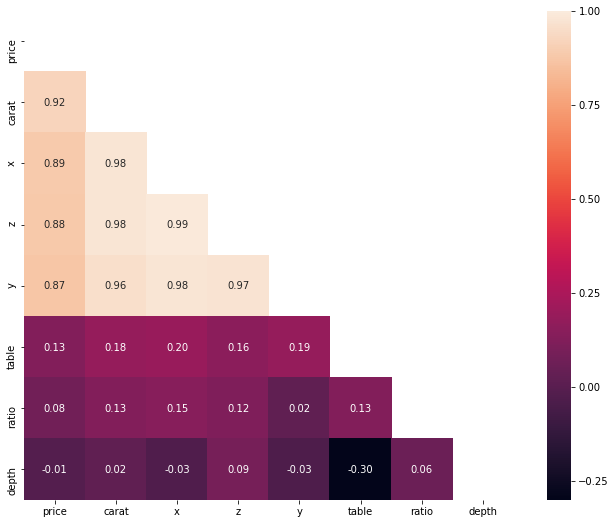

In [9]:
#correlation matrix for 15 variables with largest correlation
corrmat = diamond.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(diamond[cols].values.T)

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the correlation matrix price is highly correlated with the following features.
<ol>
<li>Carat of Diamond</li>
<li>Length of Diamond</li>
<li>Width of Diamond</li>
</ol>

<div id = "d_carat"></div>

Mean Diamond Carat = 0.797441525571653


C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


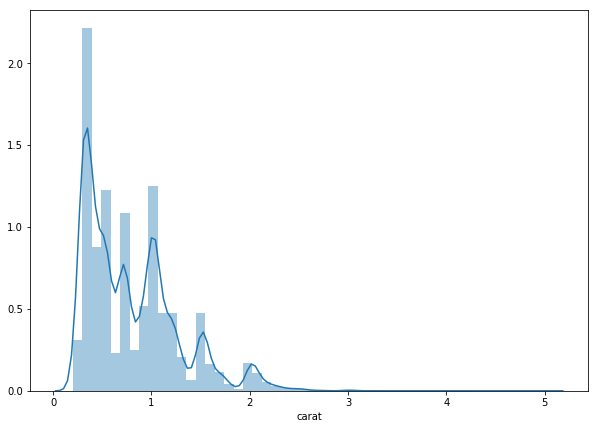

In [10]:
print("Mean Diamond Carat = " + str(np.mean(diamond.carat)))
plt.subplots(figsize=(10,7))
sns.distplot(diamond.carat)
plt.show()

<div id = "d_cut"></div>

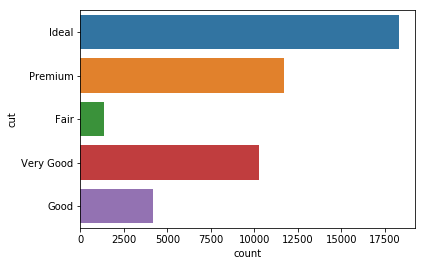

In [11]:
sns.countplot(y = diamond.cut)
plt.show()

We have a lot of diamonds of ideal an premium cut quality.

<div id = "d_depth"></div>

Mean Diamond Depth Value = 61.74496858090417


C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


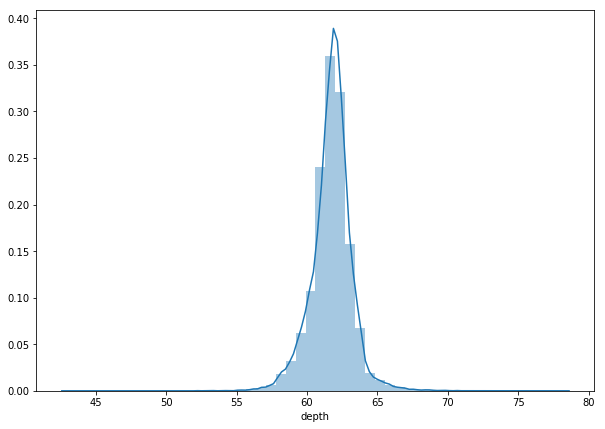

In [12]:
print("Mean Diamond Depth Value = " + str(np.mean(diamond.depth)))
plt.subplots(figsize=(10,7))
sns.distplot(diamond.depth)
plt.show()

<div id = "d_color"></div>

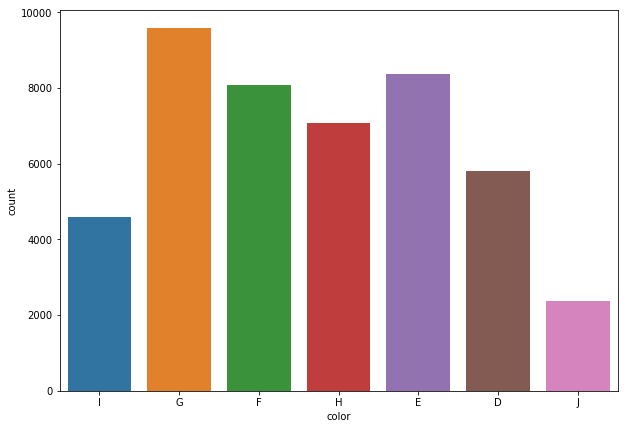

In [13]:
plt.subplots(figsize=(10,7))
sns.countplot(diamond.color)
plt.show()

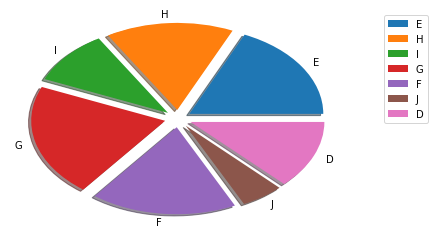

In [14]:
from collections import Counter
plt.pie(list(dict(Counter(diamond.color)).values()),
        labels = list(dict(Counter(diamond.color)).keys()),
        shadow = True,
        startangle = 0,
        explode = (0.1,0.1,0.1,0.1,0.1,0.1, 0.1));
plt.legend(list(dict(Counter(diamond.color)).keys()),loc = 2, bbox_to_anchor=(1.1, 1))
plt.show()

<div id = "d_clarity"></div>

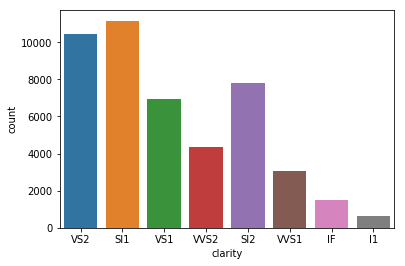

In [15]:
sns.countplot(diamond.clarity)
plt.show()

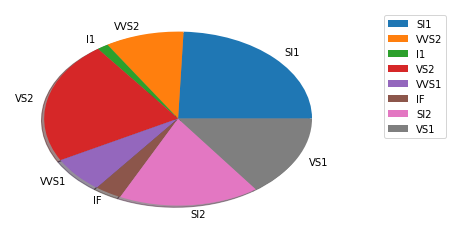

In [16]:
plt.pie(list(dict(Counter(diamond.clarity)).values()),
        labels = list(dict(Counter(diamond.clarity)).keys()),
        shadow = True,
        startangle = 0);
plt.legend(list(dict(Counter(diamond.clarity)).keys()),loc = 2, bbox_to_anchor=(1.1, 1))
plt.show()

<div id = "d_table"></div>

Mean Diamond Table Value = 57.45531506371094


C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


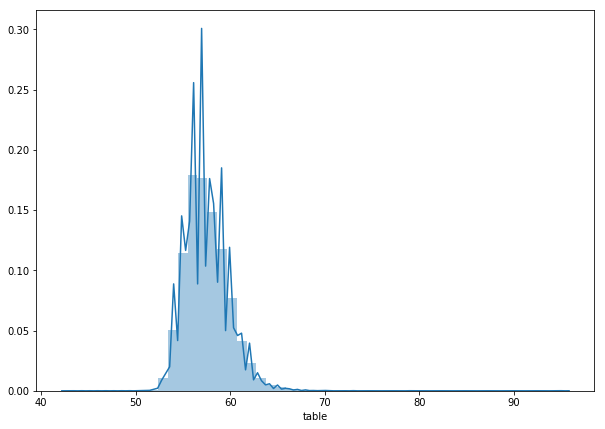

In [17]:
print("Mean Diamond Table Value = " + str(np.mean(diamond.table)))
plt.subplots(figsize=(10,7))
sns.distplot(diamond.table)
plt.show()

<div id = "d_price"></div>

C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


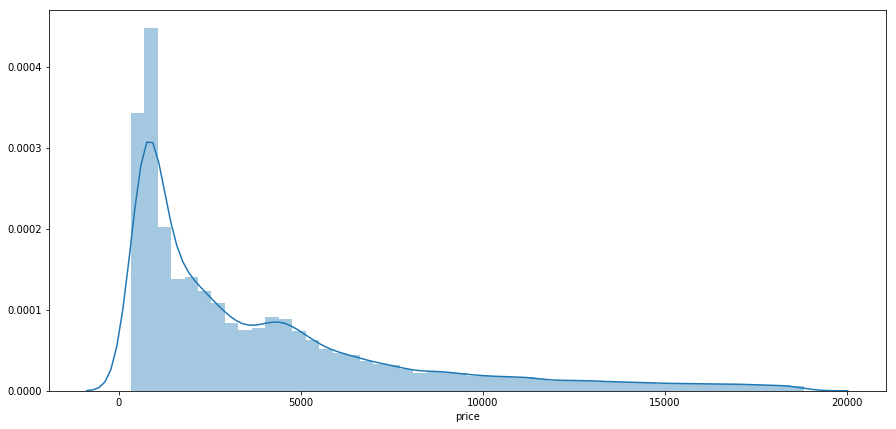

In [18]:
plt.subplots(figsize=(15,7))
sns.distplot(diamond.price)
plt.show()

Finally plotting Pairplot to find any hidden patterns. I don't see any strange pattern in the pairplot(I don't have much experience) If you see any pattern please mention it in the comments.

<div id = "d_pp"></div>

C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


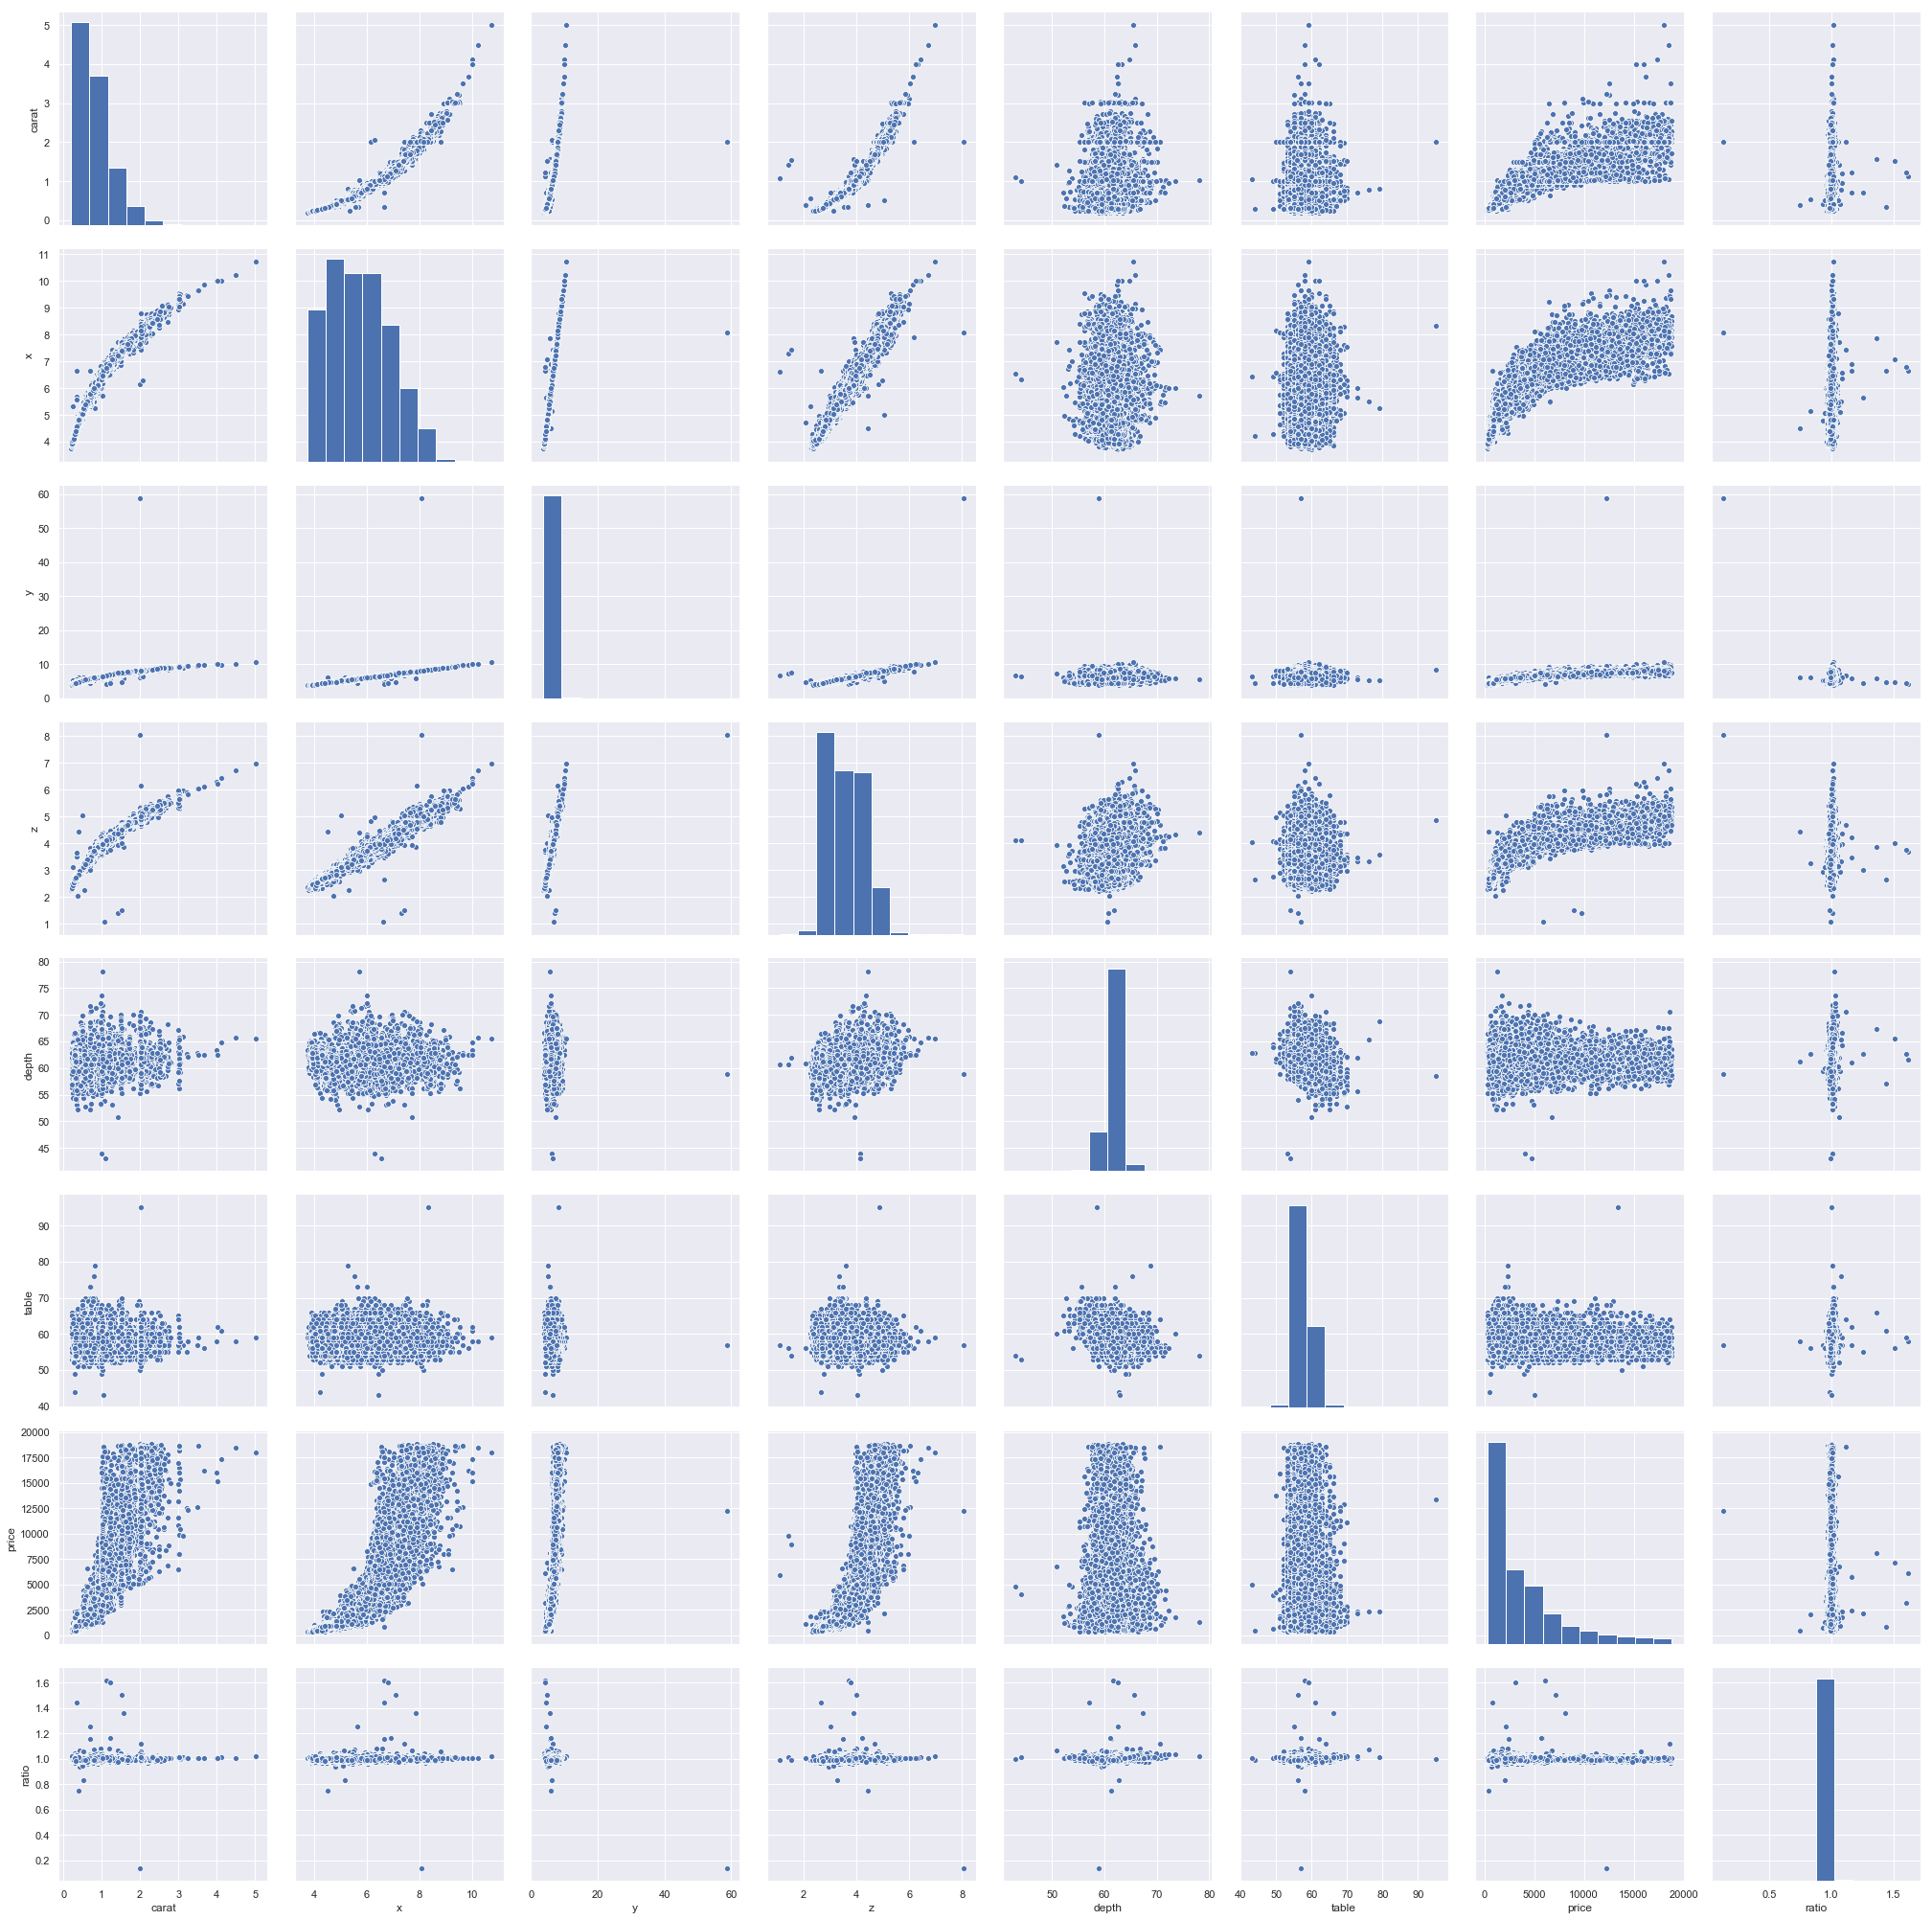

In [19]:
sns.set()
cols = diamond.columns
sns.pairplot(diamond[cols], size = 3.5)
plt.show();

<div id="feature_encoding">
<h1>Feature Encoding</h1>
<br>
Feature Encoding is an important step before starting Regression. We have to encode the values such that better feature value has higher numeric value, i.e Ideal = 4 whereas Good = 1. This is important because these values will play important part in regression as the classifier would consider larger value having more impact on the final price as compared to a smaller value. 
</div>

In [20]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [21]:
diamond.cut = diamond.cut.map(diamond_cut);
diamond.clarity = diamond.clarity.map(diamond_clarity);
diamond.color = diamond.color.map(diamond_color);

In [22]:
diamond.head()

,carat,cut,color,clarity,x,y,z,depth,table,price,ratio
0,1.62,4,1,3,7.53,7.58,4.69,62.1,55.0,10501,0.993404
1,0.30,3,3,2,4.39,4.35,2.57,58.8,60.0,574,1.009195
2,1.37,4,4,4,7.28,7.22,4.32,59.6,57.0,11649,1.008310
3,0.33,0,2,5,4.40,4.32,2.84,65.1,59.0,922,1.018519
4,0.32,2,4,3,4.43,4.48,2.62,58.8,62.0,602,0.988839


In [23]:
diamond.describe()

,carat,cut,color,clarity,x,y,z,depth,table,price,ratio
count,45832.000000,45832.00000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000,45832.000000
mean,0.797442,2.90463,3.411285,3.047870,5.731348,5.734093,3.538926,61.744969,57.455315,3930.619174,0.999472
std,0.473642,1.11711,1.701807,1.641954,1.119626,1.138814,0.691588,1.428043,2.237093,3988.272034,0.011431
min,0.200000,0.00000,0.000000,0.000000,3.730000,3.680000,1.070000,43.000000,43.000000,326.000000,0.137351
25%,0.400000,2.00000,2.000000,2.000000,4.710000,4.720000,2.910000,61.000000,56.000000,949.000000,0.992634
50%,0.700000,3.00000,3.000000,3.000000,5.700000,5.710000,3.520000,61.800000,57.000000,2400.000000,0.995763
75%,1.040000,4.00000,5.000000,4.000000,6.540000,6.540000,4.030000,62.500000,59.000000,5321.000000,1.006961
max,5.010000,4.00000,6.000000,7.000000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000,1.615572


<div id = "regression">
<h1>Lets Start with Regression</h1>
<br>
First lets divide the dataset into testing and training dataset.
I'll use different Regression models to predict the price of the diamond. I will also evaluate the model using cross validation and check standard deviation of the scores to select the best model. 
</div>

In [24]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

X = diamond.drop(['price'],1)
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# min max or standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div id = "linear"> <h2>Linear Regression</h2> </div>

In [26]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,verbose = 1)
print('Linear regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Linear regression accuracy:  -4.037696041021995
[0.91749734 0.91449971 0.91404159 0.90338804 0.90654407]
mean = 0.9111941518513215, std = 0.005316456439735507


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [27]:
classifier = SGDRegressor()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,verbose = 1)
print('Linear regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

Linear regression accuracy:  0.9017911720940985
[0.91365431 0.91172967 0.91087692 0.90278815 0.90273998]
mean = 0.9083578067169679, std = 0.0046550904408499075


C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\envs\unicamp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Progr

In [28]:
y_predict = classifier.predict(X_test)

plt.scatter

array([-340.09505134, -188.19759175, 4838.23690042, ...,  627.20296963,
       -877.51679615,  -57.74067709])

<div id = "ridge"> <h2>Ridge Regression</h2> </div>

In [ ]:
classifier = Ridge(normalize=True)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('Ridge regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<div id = "Lasso"> <h2>Lasso Regression</h2> </div>

In [ ]:
classifier = Lasso(normalize=True)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('Lasso accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<div id = "elastic"> <h2>Elastic Net Regression</h2> </div>

In [ ]:
classifier = ElasticNet()
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('Elastic Net accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<div id = "knn"> <h2>KNeighbors Regression</h2> </div>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=3)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('KNeighbors accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<div id = "mlp"> <h2>MLP Regression</h2> </div>

In [ ]:
from sklearn.neural_network import MLPRegressor
classifier = MLPRegressor(hidden_layer_sizes=(14, ), learning_rate_init = 0.1)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('MLP accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<div id = "gbr"> <h2>Gradient Boosting Regression</h2> </div>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
classifier = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2')
print('Gradient Boosting Regression accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

<h1>The following are the accuracies of different models</h1>
<ol>
<li>Linear regression :  90.90% </li>
<li>Gradient Boosting Regression:  91.28%</li>
<li>MLP Regression:  95.085%</li>
<li>Elastic Net Regression:  95.085%</li>
<li>KNeighbors accuracy:  95.283% </li>
<li>Elastic Net:  81.690%</li>
<li>Lasso accuracy:  88.657%</li>
<li>Ridge regression accuracy:  79.512%</li>
</ol>

There is still some things one can do here, stacking models or averaging models, Check model performance by Residual Plots etc... Will do it in future if possible. If you find this notebook useful, Please upvote this notebook it keeps me motivated.
Also I do look forward to suggestions, so please comment if any, Thanks!